In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the scoring/metrics functions we will use
# since it's classification
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score




## Battle Royale

There are a few things I want to test:
- which model performed best on the testing set
- which imbalance dealing method led to the best results on the testing set

In [3]:
import pandas as pd
import numpy as np
comb_over_under = pd.read_csv('trained/csv/comb_over_under.csv',index_col=0)
normal_sampling_with_weights = pd.read_csv('trained/csv/normal_sampling_with_weights.csv', index_col=0)
normal_sampling_without_weights = pd.read_csv('trained/csv/normal_sampling_without_weights.csv', index_col=0)
over_sampling_naive_random = pd.read_csv('trained/csv/over_sampling_naive_random.csv', index_col=0)
over_sampling_smotenc = pd.read_csv('trained/csv/oversampling_smotenc.csv', index_col=0)
under_sampling_tomek_links = pd.read_csv('trained/csv/undersampling_tomek_links.csv', index_col=0)
under_sampling_without_replacement = pd.read_csv('trained/csv/undersampling_without_replacement.csv', index_col=0)
under_sampling_with_replacement = pd.read_csv('trained/csv/undersampling_with_replacement.csv', index_col=0)

frames = [comb_over_under, normal_sampling_with_weights, normal_sampling_without_weights,
         over_sampling_naive_random, over_sampling_smotenc, under_sampling_tomek_links,
         under_sampling_without_replacement, under_sampling_with_replacement]
results = pd.concat(frames,ignore_index=True)
results

,type,sampling,model,average_precision_score,balanced_accuracy_score,accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score,roc_auc_score,train_time
0,LogisticRegression,comb_over_under,"LogisticRegression(C=100, class_weight='balanc...",0.333003,0.701868,0.717293,0.675545,0.497326,0.319210,0.393512,0.701868,0.041429
1,RandomForest,comb_over_under,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.446442,0.763349,0.827569,0.653753,0.610860,0.500718,0.573248,0.763349,2.987658
2,SVC_poly,comb_over_under,"SVC(C=100, break_ties=False, cache_size=200, c...",0.207018,0.500000,0.207018,1.000000,0.343023,0.000000,0.207018,0.500000,25.490243
3,SVC_rbf,comb_over_under,"SVC(C=100, break_ties=False, cache_size=200, c...",0.341133,0.706299,0.732832,0.661017,0.506024,0.336448,0.409910,0.706299,35.795588
4,XGB,comb_over_under,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.450216,0.762299,0.831579,0.644068,0.612903,0.505602,0.584615,0.762299,1.748469
5,LogisticRegression,normal_with_weights,"LogisticRegression(C=10, class_weight={0: 1, 1...",0.305439,0.601154,0.811529,0.242131,0.347222,0.260588,0.613497,0.601154,0.045980
6,RandomForest,normal_with_weights,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.480840,0.720221,0.864160,0.474576,0.591252,0.515631,0.784000,0.720221,1.598480
7,SVC_poly,normal_with_weights,"SVC(C=100, break_ties=False, cache_size=200, c...",0.207018,0.500000,0.792982,0.000000,0.000000,0.000000,0.000000,0.500000,5.461770
8,SVC_rbf,normal_with_weights,"SVC(C=100, break_ties=False, cache_size=200, c...",0.207018,0.500000,0.207018,1.000000,0.343023,0.000000,0.207018,0.500000,90.372484
9,XGB,normal_with_weights,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.483686,0.730640,0.863659,0.503632,0.604651,0.526248,0.756364,0.730640,0.512823


Let's first "battle" each type of model among themselves and then the best from each model with all the other models

In [4]:
results.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False)

,type,sampling,model,average_precision_score,balanced_accuracy_score,accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score,roc_auc_score,train_time
29,XGB,under_tomek_links,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.494820,0.746797,0.865163,0.544794,0.625869,0.545842,0.735294,0.746797,0.491518
28,RandomForest,under_tomek_links,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.489230,0.737535,0.864662,0.520581,0.614286,0.535421,0.749129,0.737535,1.482584
13,RandomForest,normal_without_weights,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.485956,0.722958,0.865664,0.479419,0.596386,0.521495,0.788845,0.722958,1.660599
9,XGB,normal_with_weights,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.483686,0.730640,0.863659,0.503632,0.604651,0.526248,0.756364,0.730640,0.512823
14,XGB,normal_without_weights,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.483686,0.730640,0.863659,0.503632,0.604651,0.526248,0.756364,0.730640,0.511569
6,RandomForest,normal_with_weights,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.480840,0.720221,0.864160,0.474576,0.591252,0.515631,0.784000,0.720221,1.598480
16,RandomForest,over_sampling_naive_random,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.466473,0.747472,0.850627,0.571429,0.612987,0.521046,0.661064,0.747472,2.295391
24,XGB,over_sampling_smotenc,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.465251,0.769145,0.839599,0.648910,0.626168,0.524222,0.604966,0.769145,1.766342
19,XGB,over_sampling_naive_random,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.456583,0.772981,0.830075,0.675545,0.622074,0.513355,0.576446,0.772981,1.645656
4,XGB,comb_over_under,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.450216,0.762299,0.831579,0.644068,0.612903,0.505602,0.584615,0.762299,1.748469


### Logistic Regression

In [5]:
log_reg_models = results[results.type=="LogisticRegression"]

In [6]:
best_log_reg = log_reg_models.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False).iloc[0]

Just looking at the Logistic Regression models it's worth seeing that not dealing with the imbalance in the dataset led to the lowest scores for the metrics considered except for accuracy (which was already established to not be a good metric in this case).

### Support Vector Machines (Polynomial Kernels)

In [7]:
svc_poly = results[results.type=="SVC_poly"]

In [8]:
best_svc_poly = svc_poly.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False).iloc[0]

### Support Vector Machines (RBF Kernel)

In [9]:
svc_rbf = results[results.type=='SVC_rbf']

In [10]:
best_svc_rbf = svc_rbf.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False).iloc[0]

### RandomForest

In [11]:
    random_forest = results[results.type=='RandomForest']

In [12]:
best_random_forest = random_forest.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False).iloc[0]

### XGBoost

In [13]:
xgb = results[results.type=='XGB']

In [14]:
best_xgb = xgb.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False).iloc[0]

# What is the best sampling method here?

Remember that one of the questions I wanted to answer was how to deal with the imbalanced dataset.

For convenience, the methods I have considered in this case study are:
- normal sampling (i.e. keeping the imbalanced dataset):
    - without class weights  
    - with class weights  
- over sampling the minority class:  
    - SMOTE-NC  
    - random over sampling  
- under sampling the majority class:  
    - without replacement  
    - with replacement  
    - removing Tomek's links  
- combined over and under sampling methods (SMOTE-NC followed by cleaning using Tomek links)


The score metrics that were measured were:

In [15]:
scorers = results.drop('train_time', axis=1).select_dtypes(exclude='object').columns.values

In [20]:
print(scorers)

['average_precision_score' 'balanced_accuracy_score' 'accuracy_score'
 'recall_score' 'f1_score' 'cohen_kappa_score' 'precision_score'
 'roc_auc_score']


The types of sampling that were used:

In [21]:
sampling_types = results['sampling'].unique()

The values for each of the sampling types for each of the scorers:

In [57]:
scorers

array(['average_precision_score', 'balanced_accuracy_score',
       'accuracy_score', 'recall_score', 'f1_score', 'cohen_kappa_score',
       'precision_score', 'roc_auc_score'], dtype=object)

In [74]:
scores = results[results.drop(['type','train_time','model'], axis=1).columns.values].groupby('sampling').agg('max')

In [75]:
scores

,average_precision_score,balanced_accuracy_score,accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score,roc_auc_score
sampling,,,,,,,,
comb_over_under,0.450216,0.763349,0.831579,1.000000,0.612903,0.505602,0.584615,0.763349
normal_with_weights,0.483686,0.730640,0.864160,1.000000,0.604651,0.526248,0.784000,0.730640
normal_without_weights,0.485956,0.730640,0.865664,0.503632,0.604651,0.526248,0.788845,0.730640
over_sampling_naive_random,0.466473,0.772981,0.850627,0.748184,0.622074,0.521046,0.661064,0.772981
over_sampling_smotenc,0.465251,0.769145,0.839599,0.709443,0.626168,0.524222,0.604966,0.769145
under_tomek_links,0.494820,0.746797,0.865163,0.544794,0.625869,0.545842,0.749129,0.746797
under_with_replacement,0.430216,0.790369,0.789975,0.803874,0.604736,0.467083,0.484672,0.790369
under_without_replacement,0.433965,0.782586,0.796992,0.769976,0.607177,0.477505,0.506472,0.782586


In [77]:
from collections import defaultdict
d = defaultdict(int)

In [78]:
for i in scores.columns:
    d[scores.sort_values(by=i, ascending=False).index[0]] +=1

In [79]:
for i,j in d.items():
    print("The {0} method won {1} times.".format(i,j))

The under_tomek_links method won 2 times.
The under_with_replacement method won 2 times.
The normal_without_weights method won 2 times.
The comb_over_under method won 1 times.
The over_sampling_smotenc method won 1 times.


In this case 

# Round 2

Let's battle each of the models and decide on which one to use. Remember that two of the metrics we care about most are:
- precision or average precision (please see below the effect of using one or the other)
- recall


In [81]:
best = [best_log_reg, best_svc_poly, best_svc_rbf, best_random_forest, best_xgb]

In [82]:
best_models = pd.concat(best,axis=1).transpose().set_index('type')

In [83]:
best_models.sort_values(by=['precision_score','recall_score', 'f1_score'],ascending=False)

,sampling,model,average_precision_score,balanced_accuracy_score,accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score,roc_auc_score,train_time
type,,,,,,,,,,,
RandomForest,under_tomek_links,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.48923,0.737535,0.864662,0.520581,0.614286,0.535421,0.749129,0.737535,1.48258
XGB,under_tomek_links,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.49482,0.746797,0.865163,0.544794,0.625869,0.545842,0.735294,0.746797,0.491518
SVC_rbf,under_without_replacement,"SVC(C=100, break_ties=False, cache_size=200, c...",0.346456,0.722809,0.710777,0.743341,0.515533,0.335927,0.394602,0.722809,2.10863
SVC_poly,over_sampling_naive_random,"SVC(C=100, break_ties=False, cache_size=200, c...",0.34477,0.720703,0.710276,0.738499,0.513468,0.333428,0.393548,0.720703,25.0774
LogisticRegression,over_sampling_naive_random,"LogisticRegression(C=100, class_weight='balanc...",0.343088,0.718598,0.709774,0.733656,0.511392,0.330918,0.392487,0.718598,0.0423336


In [96]:
best_models.sort_values(by=['average_precision_score','recall_score', 'f1_score'],ascending=False)

,sampling,model,average_precision_score,balanced_accuracy_score,accuracy_score,recall_score,f1_score,cohen_kappa_score,precision_score,roc_auc_score,train_time
type,,,,,,,,,,,
XGB,under_tomek_links,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.49482,0.746797,0.865163,0.544794,0.625869,0.545842,0.735294,0.746797,0.491518
RandomForest,under_tomek_links,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.48923,0.737535,0.864662,0.520581,0.614286,0.535421,0.749129,0.737535,1.48258
SVC_rbf,under_without_replacement,"SVC(C=100, break_ties=False, cache_size=200, c...",0.346456,0.722809,0.710777,0.743341,0.515533,0.335927,0.394602,0.722809,2.10863
SVC_poly,over_sampling_naive_random,"SVC(C=100, break_ties=False, cache_size=200, c...",0.34477,0.720703,0.710276,0.738499,0.513468,0.333428,0.393548,0.720703,25.0774
LogisticRegression,over_sampling_naive_random,"LogisticRegression(C=100, class_weight='balanc...",0.343088,0.718598,0.709774,0.733656,0.511392,0.330918,0.392487,0.718598,0.0423336


Looking at the first two we can see that both the XGB and RandomForest model performed really well and that they were within 2-3% of each other in every single one of scores. The next best one (SVC with a radial basis function kernel) was close in some of the scores but quite far for the other ones. Please note that although recall is important (as we do want to identify as many customers that churned), we also don't want to send a lot of unnecessary emails/push notifications because of low precision.

Let's fine tune the two models slightly more and then give the first prize and the participation model.

# Tuning the XGB and Random Forest Models

In [84]:
#import all the necessary models
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# import the scoring/metrics functions we will use
# since it's classification
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from time import time



X_train = np.loadtxt('X_train')
X_test = np.loadtxt('X_test')
y_train = np.loadtxt('y_train')
y_test = np.loadtxt('y_test')

def choose_best(model, train_x , train_y , test_x , test_y):
    results = dict()
    results['model'] = model
    
    # for calculate time of fitting data
    start = time()
    model.fit(train_x,train_y)
    end = time()
    results['train_time'] = end-start
    
    # get the predicted results
    pred_y = model.predict(test_x)
    
    # calculate the various metrics
    results['average_precision_score'] = average_precision_score(test_y, pred_y)
    results['balanced_accuracy_score'] = balanced_accuracy_score(test_y, pred_y)
    results['accuracy_score'] = accuracy_score(test_y, pred_y)
    results['recall_score'] = recall_score(test_y, pred_y)
    results['f1_score'] = f1_score(test_y, pred_y)
    results['cohen_kappa_score'] = cohen_kappa_score(test_y, pred_y)
    results['precision_score'] = precision_score(test_y, pred_y)
    results['roc_auc_score'] = roc_auc_score(test_y, pred_y)
    return results


## Tuning the XGB model

In [85]:
print(best_xgb.model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


It's important to train it the same way we trained it before. So let's have a look at which sampling method we used.

In [86]:
print(best_xgb.sampling)

under_tomek_links


Please note that the sampling method that led to this model was not one of the "winning" ones. That is because the winning ones were based on the averages of all the models.

In [87]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [88]:
# Time for XGBoost
xgb_param_grid = {'max_depth':[3,4,5],
        'gamma':[1e-2, 1e-3, 1e-4],
        'min_child_weight':[1,2,3],
        'n_estimators':[100,150,200],
        'min_child_weight':[1,2,3]
        }
xgb_clas = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_clas, xgb_param_grid,
        cv = 5,
        refit = True,
        n_jobs = -1,
        scoring = 'average_precision')
xgb_grid_search.fit(X_resampled, y_resampled)
# Run the model on the testing dataset to compute the various metrics
xgb_model = xgb_grid_search.best_estimator_
xgb_results = choose_best(xgb_model, X_resampled, y_resampled, X_test, y_test)

In [89]:
xgb_results['model']

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
# Time for XGBoost
xgb_param_grid = {'max_depth':[3,4,5],
        'gamma':[1e-2, 1e-3, 1e-4],
        'min_child_weight':[1,2,3],
        'n_estimators':[110,120,130],
        'min_child_weight':[1,2,3]
        }
xgb_clas = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_clas, xgb_param_grid,
        cv = 5,
        refit = True,
        n_jobs = -1,
        scoring = 'average_precision')
xgb_grid_search.fit(X_resampled, y_resampled)
# Run the model on the testing dataset to compute the various metrics
xgb_model = xgb_grid_search.best_estimator_
xgb_results = choose_best(xgb_model, X_resampled, y_resampled, X_test, y_test)

In [91]:
xgb_results['model']

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
# Time for XGBoost
xgb_param_grid = {'max_depth':[4],
        'gamma':[1e-3],
        'min_child_weight':[2],
        'n_estimators':[108,109,110,111,112],
        'min_child_weight':[2]
        }
xgb_clas = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_clas, xgb_param_grid,
        cv = 5,
        refit = True,
        n_jobs = -1,
        scoring = 'average_precision')
xgb_grid_search.fit(X_resampled, y_resampled)
# Run the model on the testing dataset to compute the various metrics
xgb_model = xgb_grid_search.best_estimator_
xgb_results = choose_best(xgb_model, X_resampled, y_resampled, X_test, y_test)

In [111]:
xgb_results

{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.001,
               learning_rate=0.1, max_delta_step=0, max_depth=4,
               min_child_weight=2, missing=None, n_estimators=111, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 'train_time': 0.3396480083465576,
 'average_precision_score': 0.48884840030981236,
 'balanced_accuracy_score': 0.7461109087402773,
 'accuracy_score': 0.86265664160401,
 'recall_score': 0.5472154963680388,
 'f1_score': 0.6225895316804408,
 'cohen_kappa_score': 0.5405821998399774,
 'precision_score': 0.7220447284345048,
 'roc_auc_score': 0.7461109087402772}

In [112]:
xgb_predicted_y = xgb_model.predict(X_test)

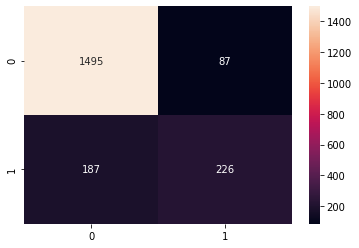

In [113]:
xgb_confMatrix = confusion_matrix(y_test, xgb_predicted_y)
sns.heatmap(xgb_confMatrix, annot=True, fmt='d')

We missed 187 customers that churned when we thought they wouldn't.
We thought 87 customers would churn when they actually didn't. 

In [100]:
    print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1582
         1.0       0.72      0.55      0.62       413

    accuracy                           0.86      1995
   macro avg       0.81      0.75      0.77      1995
weighted avg       0.85      0.86      0.86      1995



## Tuning the Random Forest model

In [101]:
print(best_random_forest.model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


It's important to train it the same way we trained it before. So let's have a look at which sampling method we used.

In [102]:
print(best_random_forest.sampling)

under_tomek_links


In [103]:
print(best_random_forest.model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [104]:
# Time for Random Forest

random_forest_param_grid = {'n_estimators':[180,200,220],
        'max_depth':[7,8,9],
        'min_samples_split':[5,6,7],
        'max_features':[4,5,6]}
random_forest_clas = RandomForestClassifier()
random_forest_grid_search = GridSearchCV(random_forest_clas, random_forest_param_grid,
        cv = 5,
        refit = True,
        n_jobs = -1,
        scoring='average_precision')
random_forest_grid_search.fit(X_resampled,y_resampled)
# Run the model on the testing dataset to compute the various metrics
rf_model = random_forest_grid_search.best_estimator_
rf_results = choose_best(rf_model, X_resampled, y_resampled, X_test, y_test)


In [105]:
rf_results['model']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
# Time for Random Forest

random_forest_param_grid = {'n_estimators':[199,200,201],
        'max_depth':[8],
        'min_samples_split':[6],
        'max_features':[5]}
random_forest_clas = RandomForestClassifier()
random_forest_grid_search = GridSearchCV(random_forest_clas, random_forest_param_grid,
        cv = 5,
        refit = True,
        n_jobs = -1,
        scoring='average_precision')
random_forest_grid_search.fit(X_resampled,y_resampled)
# Run the model on the testing dataset to compute the various metrics
rf_model = random_forest_grid_search.best_estimator_
rf_results = choose_best(rf_model, X_resampled, y_resampled, X_test, y_test)


In [109]:
rf_results['model']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

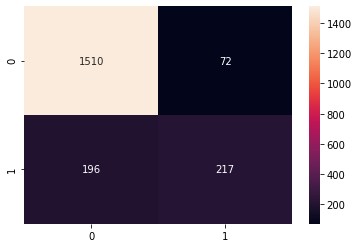

In [114]:
rf_predicted_y = rf_model.predict(X_test)
rf_confMatrix = confusion_matrix(y_test, rf_predicted_y)
sns.heatmap(rf_confMatrix, annot=True, fmt='d')

We missed 196 customers that churned when we thought they wouldn't.
We thought 72 customers would churn when they actually didn't. 

In [153]:
    print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1582
         1.0       0.75      0.51      0.61       413

    accuracy                           0.86      1995
   macro avg       0.82      0.73      0.76      1995
weighted avg       0.86      0.86      0.85      1995



## SBS Comparison

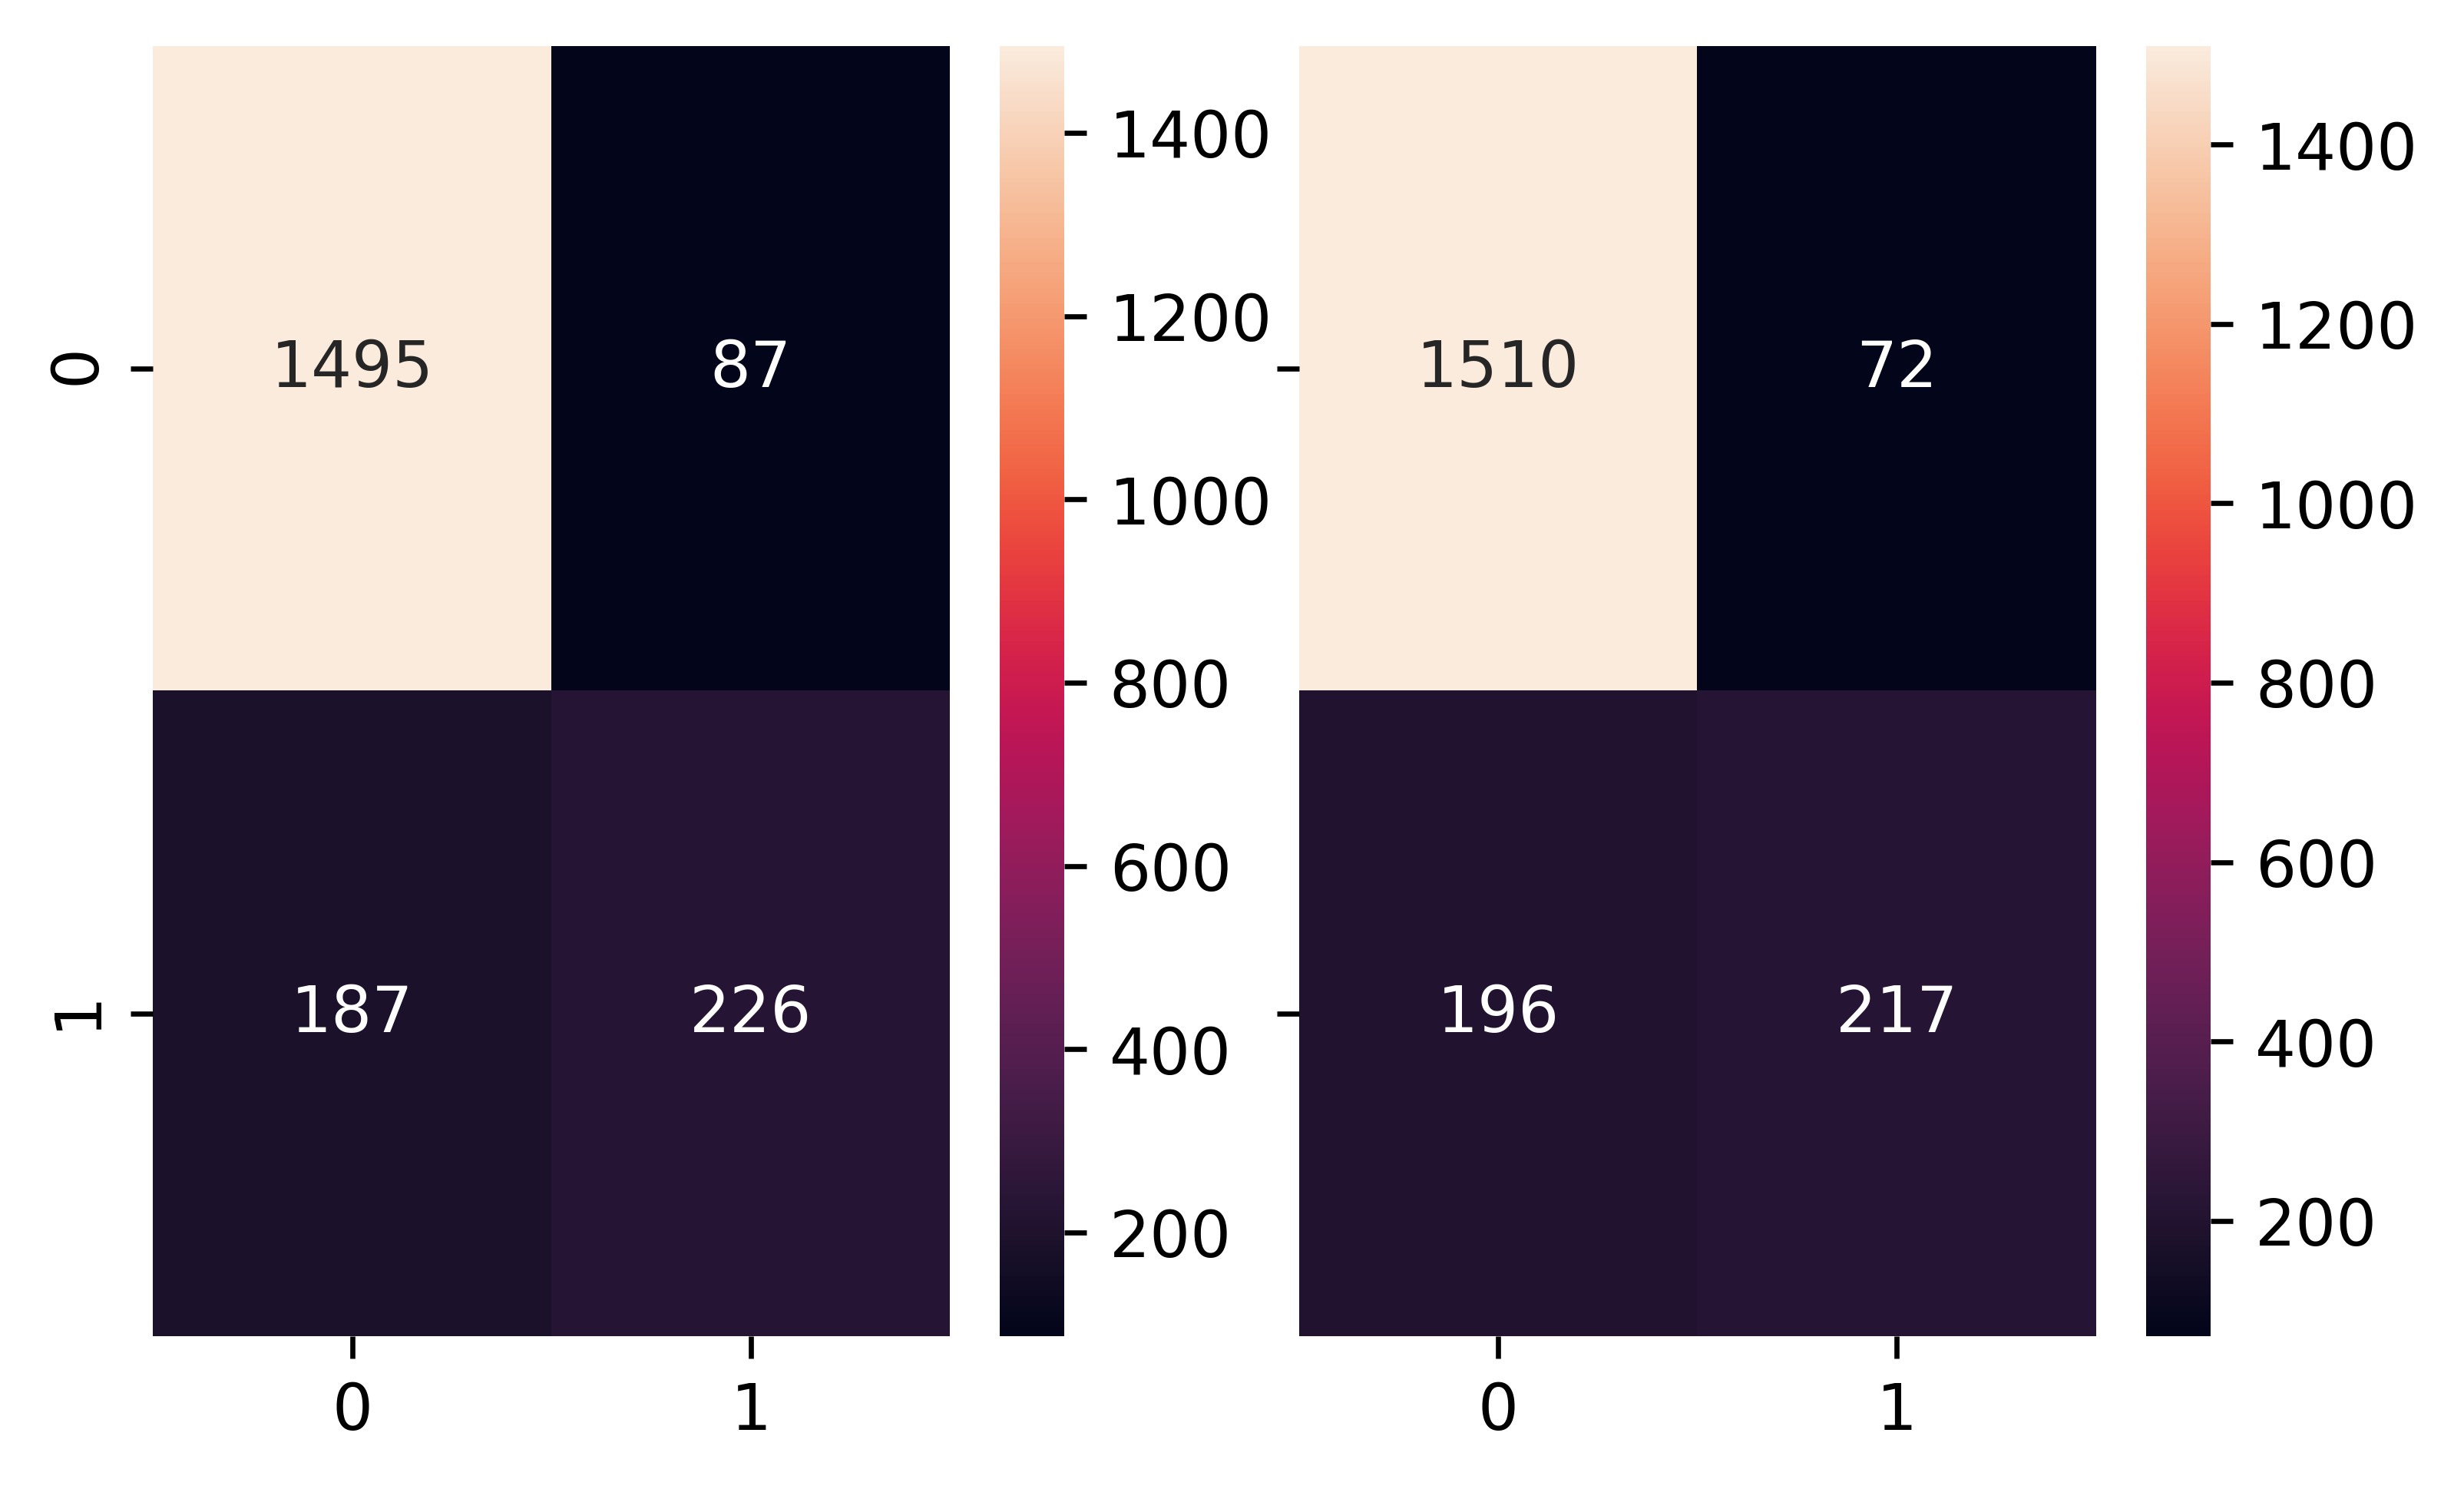

In [116]:
fig, axarr = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.figsize=(10,6)
fig.dpi = 600

sns.heatmap(xgb_confMatrix, annot=True, fmt='d', ax=axarr[0])

fig.subplots_adjust(wspace=0.15, bottom=0.15, top=0.85)

sns.heatmap(rf_confMatrix, annot=True, fmt='d', ax=axarr[1])


In [117]:
print("XGB Model")
print(classification_report(y_test,xgb_predicted_y))

print("Random Forest Model")
print(classification_report(y_test,rf_predicted_y))

XGB Model
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1582
         1.0       0.72      0.55      0.62       413

    accuracy                           0.86      1995
   macro avg       0.81      0.75      0.77      1995
weighted avg       0.85      0.86      0.86      1995

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1582
         1.0       0.75      0.53      0.62       413

    accuracy                           0.87      1995
   macro avg       0.82      0.74      0.77      1995
weighted avg       0.86      0.87      0.86      1995



The difference between the two model is minimal. The scores that are different are the Class 1 (churned) precision and recall. The XGB model has a marginally better recall and the Random Forest model has a marginally better precision score. Since the numbers are close and we would like to avoid customers churning, the choice is now made.

## Round 2 Summary

Ladies and Gentlemen, we have a winner! XGB trained on undersampled dataset through the removal of tomek links.

In [118]:
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=111, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [119]:
xgb_results

{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0.001,
               learning_rate=0.1, max_delta_step=0, max_depth=4,
               min_child_weight=2, missing=None, n_estimators=111, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 'train_time': 0.3396480083465576,
 'average_precision_score': 0.48884840030981236,
 'balanced_accuracy_score': 0.7461109087402773,
 'accuracy_score': 0.86265664160401,
 'recall_score': 0.5472154963680388,
 'f1_score': 0.6225895316804408,
 'cohen_kappa_score': 0.5405821998399774,
 'precision_score': 0.7220447284345048,
 'roc_auc_score': 0.7461109087402772}

Please note that we still missed almost 50% of the people that churned. The model can be improved by collecting more data and addressing the class imbalance and/or through some feature engineering that might provide a better separation between the classes.